# Some other examples with pandas

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import pandas as pd
mpl.rcParams['figure.dpi'] = 96

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/serivan/mldmlab/master/Datasets/clementinum.csv')
df.head(10)

,year,month,day,avg,max,min,prec
0,1972,1,1,0.6,2.8,-0.3,0.0
1,1972,1,2,1.6,2.5,-1.4,0.0
2,1972,1,3,3.5,4.0,2.3,0.0
3,1972,1,4,4.0,4.8,2.9,0.2
4,1972,1,5,2.2,3.6,1.3,3.0
5,1972,1,6,0.5,2.3,-1.2,0.0
6,1972,1,7,1.7,2.3,0.8,0.6
7,1972,1,8,1.2,1.8,0.0,1.1
8,1972,1,9,1.7,2.2,0.2,0.0
9,1972,1,10,2.1,2.6,1.0,0.0


In [0]:
df.index = pd.to_datetime(df[['year', 'month', 'day']])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16071 entries, 1972-01-01 to 2015-12-31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    16071 non-null  int64  
 1   month   16071 non-null  int64  
 2   day     16071 non-null  int64  
 3   avg     16071 non-null  float64
 4   max     16071 non-null  float64
 5   min     16071 non-null  float64
 6   prec    16071 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1004.4 KB


In [9]:
df.head(10)

,year,month,day,avg,max,min,prec
1972-01-01,1972,1,1,0.6,2.8,-0.3,0.0
1972-01-02,1972,1,2,1.6,2.5,-1.4,0.0
1972-01-03,1972,1,3,3.5,4.0,2.3,0.0
1972-01-04,1972,1,4,4.0,4.8,2.9,0.2
1972-01-05,1972,1,5,2.2,3.6,1.3,3.0
1972-01-06,1972,1,6,0.5,2.3,-1.2,0.0
1972-01-07,1972,1,7,1.7,2.3,0.8,0.6
1972-01-08,1972,1,8,1.2,1.8,0.0,1.1
1972-01-09,1972,1,9,1.7,2.2,0.2,0.0
1972-01-10,1972,1,10,2.1,2.6,1.0,0.0


In [10]:
df.tail()

,year,month,day,avg,max,min,prec
2015-12-27,2015,12,27,9.8,13.5,6.9,0.0
2015-12-28,2015,12,28,10.2,12.3,8.4,0.0
2015-12-29,2015,12,29,5.7,10.1,4.8,0.0
2015-12-30,2015,12,30,2.6,6.4,0.9,0.0
2015-12-31,2015,12,31,0.2,2.5,-2.2,0.1


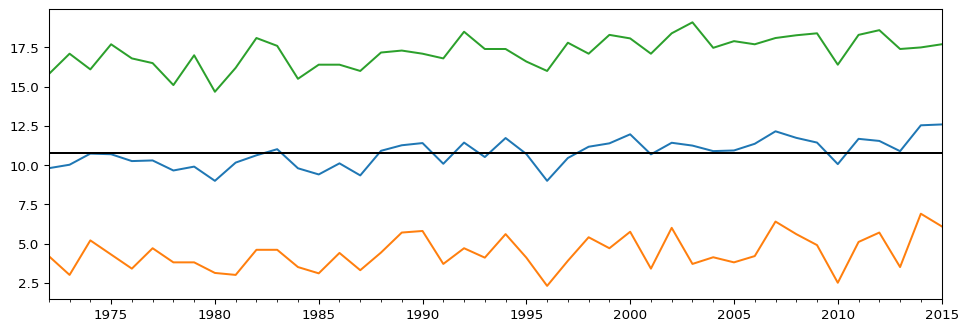

In [11]:
figure(figsize=(12,4))
df['avg'].resample('Y').mean().plot()
df['avg'].resample('Y').quantile(0.25).plot()
df['avg'].resample('Y').quantile(0.75).plot()
axhline(df.avg.mean(), color='k');

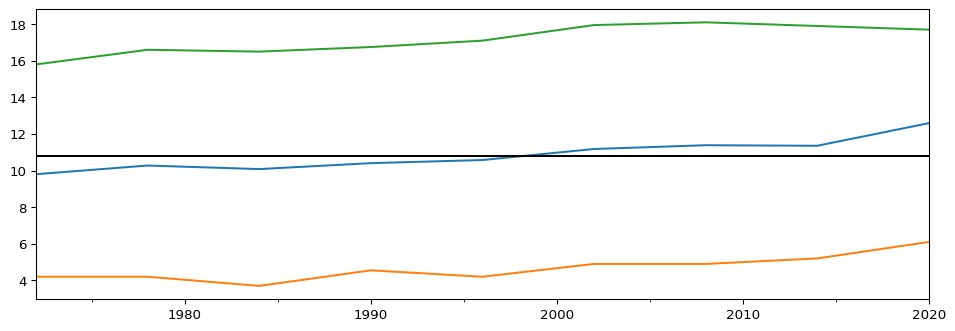

In [12]:
figure(figsize=(12,4))
df['avg'].resample('6Y').mean().plot()
df['avg'].resample('6Y').quantile(0.25).plot()
df['avg'].resample('6Y').quantile(0.75).plot()
axhline(df.avg.mean(), color='k');

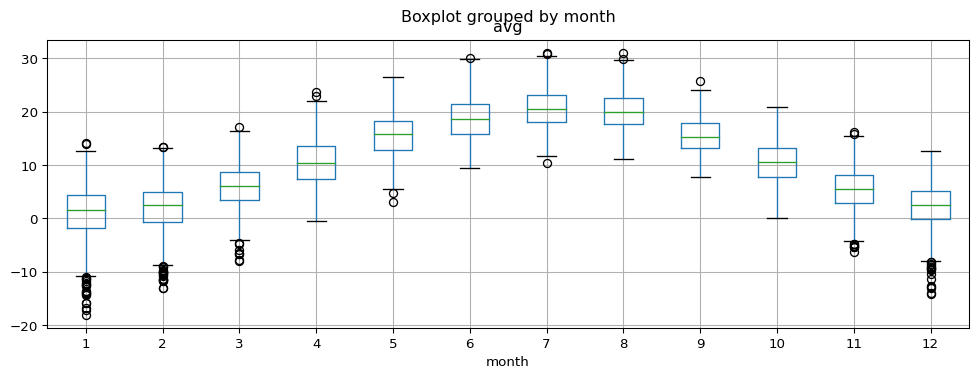

In [13]:
fig, ax = subplots(figsize=(12,4))
df.boxplot(column='avg', by='month', ax=ax);

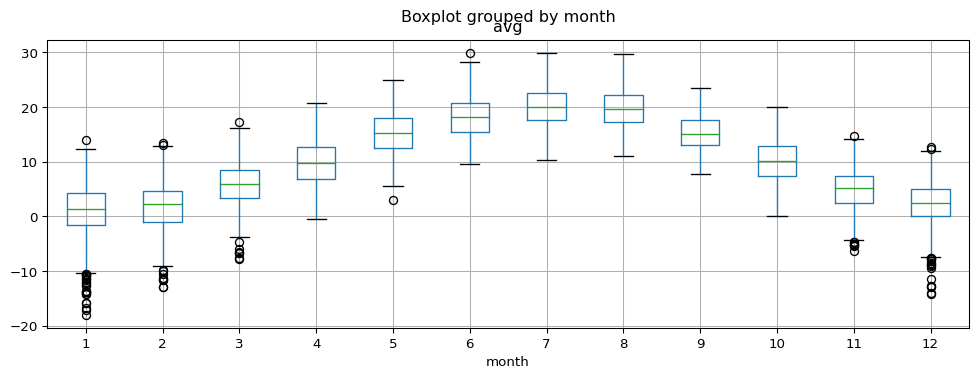

In [14]:
fig, ax = subplots(figsize=(12,4))
df[df.year<2000].boxplot(column='avg', by='month', ax=ax);

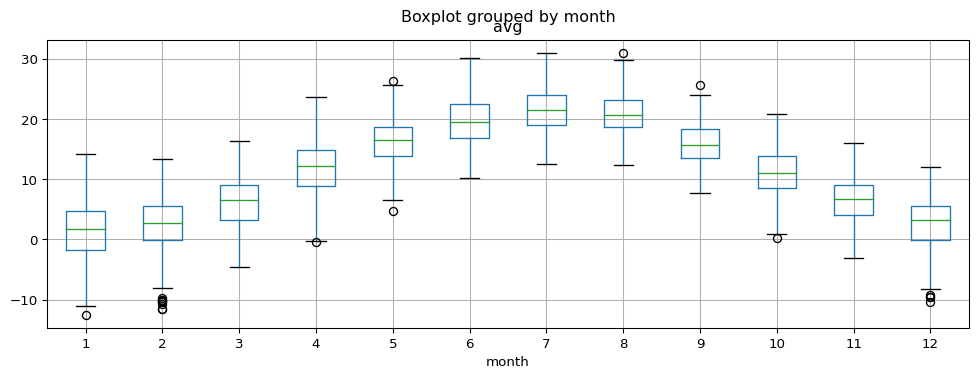

In [15]:
fig, ax = subplots(figsize=(12,4))
df[df.year>=2000].boxplot(column='avg', by='month', ax=ax);

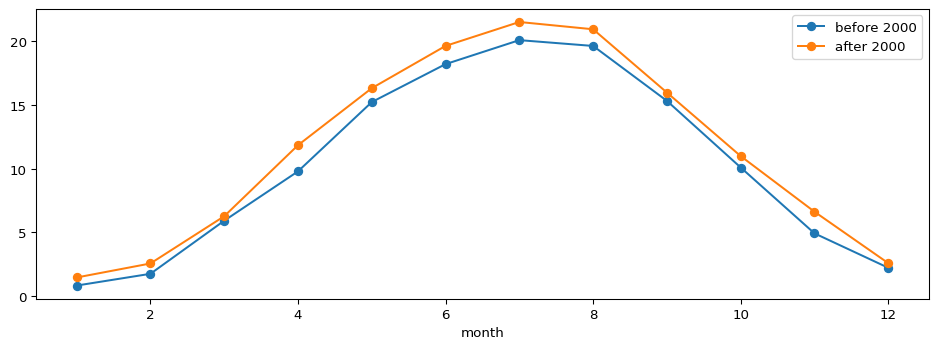

In [16]:
figure(figsize=(12,4))
df[df.year<2000].groupby('month')['avg'].mean().plot(marker='o', label='before 2000')
df[df.year>=2000].groupby('month')['avg'].mean().plot(marker='o', label='after 2000')
legend();